In [1]:
import qiskit

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel ="ibm_quantum", token ="62b69d417d3c4b7ec5066a8368c5fcb11e80162f211e9419bdba2cfc3514b86a1cc0d05a887dffc5dd8c7ebe68e5e4df033d22b5ebcb7abc67db93c32709b01c")

In [3]:
from qiskit.quantum_info import SparsePauliOp

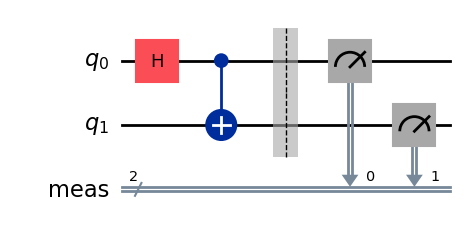

In [15]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler
import numpy as np

qc = QuantumCircuit(2) 
qc.h(0) 
qc.cx(0,1)
qc.measure_all()

qc.draw("mpl")

ibm_sherbrooke


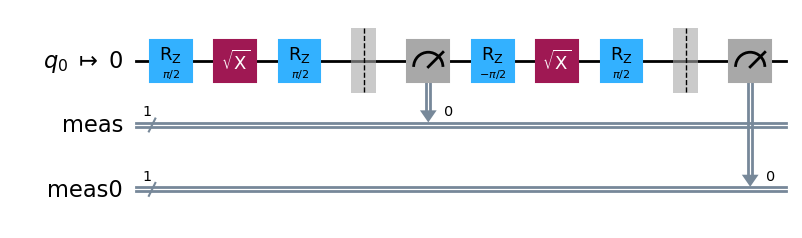

In [5]:
backend = service.backend(name = "ibm_sherbrooke")

service = QiskitRuntimeService(channel ="ibm_quantum", token ="62b69d417d3c4b7ec5066a8368c5fcb11e80162f211e9419bdba2cfc3514b86a1cc0d05a887dffc5dd8c7ebe68e5e4df033d22b5ebcb7abc67db93c32709b01c")

print(backend.name)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

isa_circuit.draw('mpl', idle_wires=False)

In [6]:
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
backend = FakeAlmadenV2()


sampler = Sampler(backend)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)


job = sampler.run([isa_circuit])
print(f">>> Job ID: {job.job_id()}")

result = job.result()

job_result = job.result()

pub_result = job.result()[0]

>>> Job ID: cd338e8c-a342-4c69-9204-76be95b99057


/opt/miniconda3/envs/cwq/lib/python3.12/site-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:357: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


 > Counts for pub 0: {'0': 513, '1': 511}


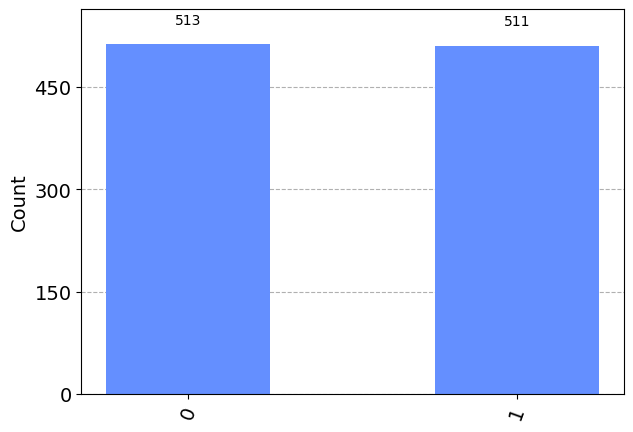

In [7]:
for idx, pub_result in enumerate(result):
    print(f" > Counts for pub {idx}: {pub_result.data.meas.get_counts()}")

from qiskit.visualization import plot_histogram

plot_histogram(pub_result.data.meas.get_counts())

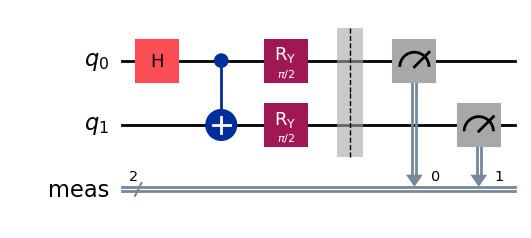

In [8]:

qc = QuantumCircuit(2) # Create a new circuit with two qubits
qc.h(0) # Add a Hadamard gate to qubit 0
qc.cx(0, 1)# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.ry(np.pi/2,0)
qc.ry(np.pi/2,1)
qc.measure_all()

qc.draw("mpl")

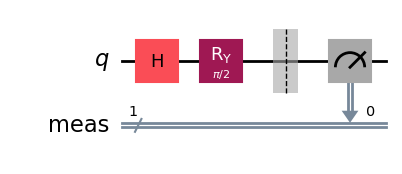

In [9]:
qc = QuantumCircuit(1) 
qc.h(0) 
qc.ry(np.pi/2,0)

qc.measure_all()

qc.draw("mpl")

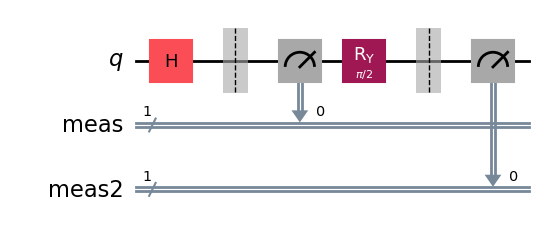

In [14]:
qc = QuantumCircuit(1) 
qc.h(0) 
qc.measure_all()
qc.ry(np.pi/2,0)

qc.measure_all()

qc.draw("mpl")